In [5]:
from sklearn.datasets import fetch_lfw_people
faces=fetch_lfw_people(min_faces_per_person=20)
print(faces.target_names)
print(faces.images.shape)

['Alejandro Toledo' 'Amelie Mauresmo' 'Ariel Sharon' 'Atal Bihari Vajpayee'
 'Bill Clinton' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Hamid Karzai' 'Hans Blix'
 'Igor Ivanov' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lleyton Hewitt' 'Megawati Sukarnoputri' 'Pete Sampras' 'Serena Williams'
 'Tiger Woods' 'Tom Daschle' 'Tony Blair' 'Vicente Fox']
(1816, 62, 47)


In [7]:
faces.target

array([17,  7,  2, ...,  7, 16,  8], dtype=int64)

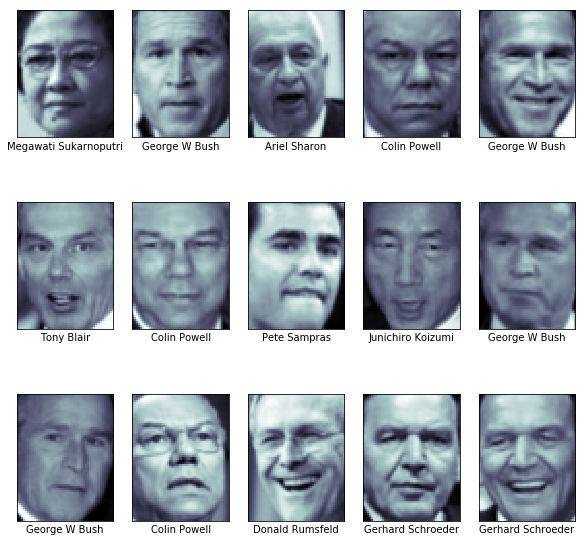

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
fig,ax=plt.subplots(3,5)
fig.set_figwidth(10,10)
fig.set_figheight(10,10)

for i,axi in enumerate(ax.flat):
    axi.imshow(faces.images[i],cmap='bone')
    axi.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [34]:
from sklearn.svm import SVC
from sklearn.decomposition import RandomizedPCA
from sklearn.pipeline import make_pipeline

pca=RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf',class_weight='balanced')
model=make_pipeline(pca,svc)


C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(faces.data,faces.target,random_state=42)

In [36]:
from sklearn.grid_search import GridSearchCV
param_grid={'svc__C':[1,5,10,20,50],
           'svc__gamma':[0.0001,0.0005,0.001,0.005]}
grid=GridSearchCV(model,param_grid)

In [37]:
final=grid.fit(Xtrain,ytrain)


C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new

C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new

C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Lenovo\python\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new

In [38]:
grid.best_params_

{'svc__C': 20, 'svc__gamma': 0.001}

In [39]:
model=grid.best_estimator_

In [40]:
y_pred=model.predict(Xtest)


Text(0.5,0.98,'Predicted Names,Incorrect are labelled in red')

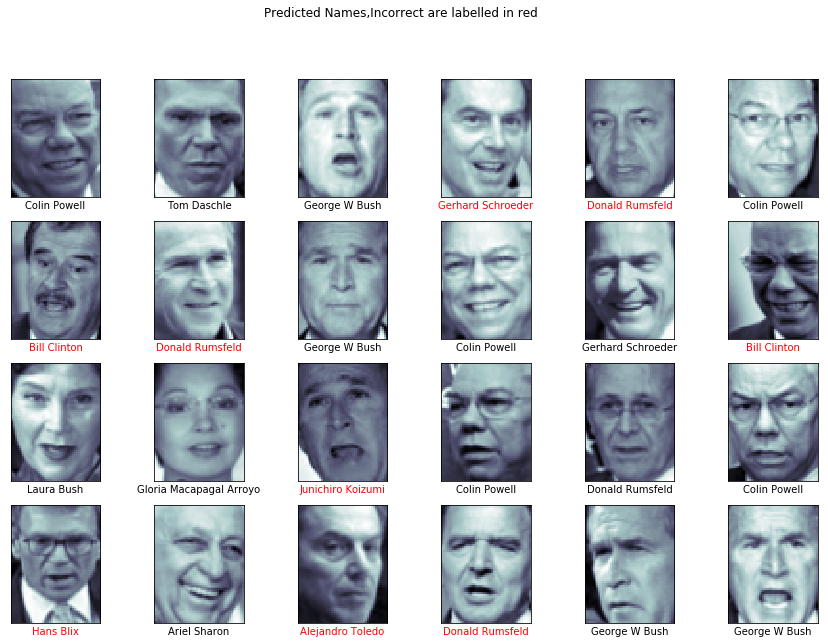

In [54]:
fig,ax = plt.subplots(4,6)
fig.set_figwidth(15,10)
fig.set_figheight(10,10)
for i,axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(faces.images.shape[1:3]),cmap='bone')
    axi.set(xticks=[],yticks=[])
    axi.set_xlabel(faces.target_names[y_pred[i]],color='black' if y_pred[i]==ytest[i] else 'red')
    
fig.suptitle('Predicted Names,Incorrect are labelled in red')    

In [47]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred,target_names=faces.target_names))

                         precision    recall  f1-score   support

       Alejandro Toledo       0.62      0.50      0.56        10
        Amelie Mauresmo       0.75      0.75      0.75         4
           Ariel Sharon       0.64      0.73      0.68        22
   Atal Bihari Vajpayee       1.00      0.33      0.50         3
           Bill Clinton       0.57      0.67      0.62         6
           Colin Powell       0.74      0.84      0.79        62
        Donald Rumsfeld       0.74      0.76      0.75        41
          George W Bush       0.83      0.88      0.85       123
      Gerhard Schroeder       0.62      0.84      0.71        19
Gloria Macapagal Arroyo       1.00      1.00      1.00        17
           Hamid Karzai       0.50      0.20      0.29         5
              Hans Blix       0.60      0.33      0.43         9
            Igor Ivanov       0.25      0.20      0.22         5
      Junichiro Koizumi       0.72      0.87      0.79        15
             Kofi Annan 

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
con=confusion_matrix(ytest,y_pred)


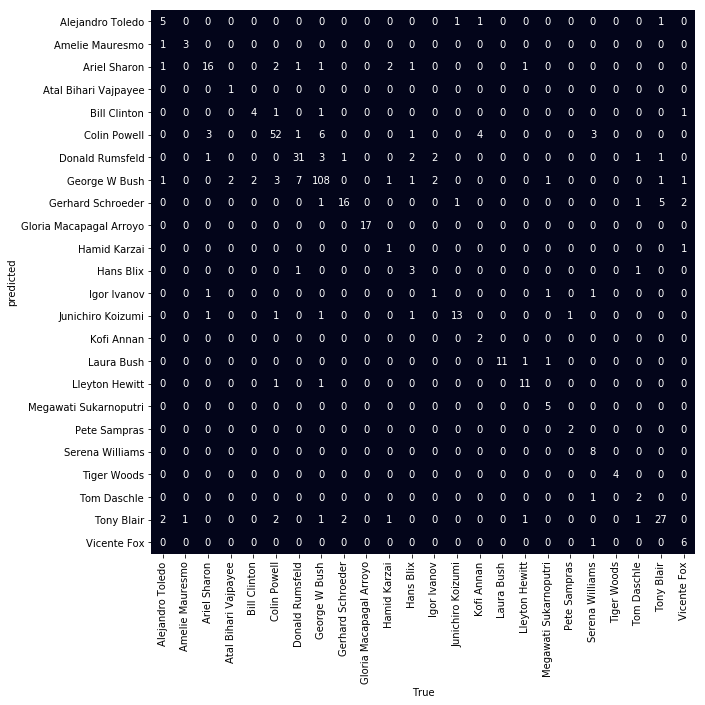

In [55]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(con.T,square=True,annot=True,fmt='d',cbar=False,vmin=100,vmax=100
           ,xticklabels=faces.target_names,yticklabels=faces.target_names)
plt.xlabel('True')
plt.ylabel('predicted');